# Exercises table analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Numerical-data" data-toc-modified-id="Numerical-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Numerical data</a></span><ul class="toc-item"><li><span><a href="#Summary-statistics" data-toc-modified-id="Summary-statistics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Summary statistics</a></span></li><li><span><a href="#Normal-distribution-evaluation" data-toc-modified-id="Normal-distribution-evaluation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Normal distribution evaluation</a></span></li><li><span><a href="#Data-distribution-evaluation" data-toc-modified-id="Data-distribution-evaluation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data distribution evaluation</a></span></li><li><span><a href="#Outliers-detection" data-toc-modified-id="Outliers-detection-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Outliers detection</a></span></li></ul></li><li><span><a href="#Categorical-data" data-toc-modified-id="Categorical-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Categorical data</a></span><ul class="toc-item"><li><span><a href="#Frequency-tables" data-toc-modified-id="Frequency-tables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Frequency tables</a></span></li></ul></li></ul></div>

## Introduction

In this document there will be statistical analysis of Exercises table. 
Exercises table has 39 variables (columns) and 973 records. 
There is a lot of missing data.
For the analysis below libraries will be used:

* pandas
* numpy
* statistics
* matplotlib.pyplot
* seaborn
* pingouin
* distfit

Below there are information about this dataset. 

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pingouin as pg
import statsmodels.api as sm
import matplotlib as mpl
from scipy import stats
from distfit import distfit

exercises = pd.read_csv('/home/evida-monika/mhunters/exercises.csv', sep = ';', on_bad_lines='skip', low_memory=False)
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["image.cmap"] = "Pastel2"

In [3]:
exercises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      973 non-null    int64  
 1   video                   388 non-null    object 
 2   reps                    973 non-null    int64  
 3   time                    973 non-null    int64  
 4   created_at              973 non-null    object 
 5   updated_at              973 non-null    object 
 6   legacy_id               776 non-null    object 
 7   deprecated              973 non-null    object 
 8   replacement_legacy_id   98 non-null     float64
 9   family                  379 non-null    float64
 10  sub_family              0 non-null      float64
 11  body_parts_focused      690 non-null    object 
 12  muscles                 862 non-null    object 
 13  joints                  862 non-null    object 
 14  met_multiplier          707 non-null    fl

There is some disproportion - 863 names in Spanish and 852 names in English.

Multiple columns as:

* *video*,
* *reps*,
* *time*,
* *legacy_id*,
* *deprecated*,
* *replacement_legacy_id*,
* *family*,
* *sub_family*,
* *video_female*,
* *video_male*,
* *harder_variation_id*,
* *easier_variation_id*,
* *name_es*,
* *description_en*,
* *description_es*,
* *implement_variation_id*,
* *test_correction*,
* *thumbnail*,
* *thumbnail_male*,
* *thumbnail_female*,
* *note_en*,
* *note_es*,
* *notes_en*,
* *notes_es*,
* *execution_time*,
* *thumbnail_400*,
* *thumbnail_400_male*,
* *thumbnail_400_female*,
* *coach_id*,
* *test_equivalent_id*,
* *t1_min*,
* *t1_max*,
* *excluded*

will be dropped, because they won't be useful for analysis. So now, the only variables taken into consideration are:

* *created_at* - when was the exercise created,
* *updated_at* - when was the last time the exercise was updated,
* *body_parts_focused* - what body parts did the exercise focus on,
* *muscles* - what muscles were used in exercise,
* *joints* - what joints were used in exercise,
* *met_multiplier* - the metabolic equivalent of task (MET) is the ratio of the metabolic rate during exercise to the metabolic rate at rest, it is divided into three groups: 
    - light (MET < 3.0), 
    - moderate (3.0 $\leq$ MET $\leq$ 6.0), 
    - vigorous (MET > 6.0), 

  in summary it can be said that: 
     - one MET is defined as the energy you use when one is resting or sitting still, 
     - an activity that has a value of 4 METs means one is exerting four times the energy than you would if you were sitting still 
     
  (according to https://www.healthline.com/health/what-are-mets#definition), 
* *met_multiplier_category* - column with category of MET, added.
* *name_en* - name of the exercise.

Their non-null counts and types are given below.

In [14]:
exercises2 = exercises.drop(['video','reps', 'time','legacy_id','deprecated', 
                             'replacement_legacy_id', 'family', 'sub_family',
                             'video_female', 'video_male', 'harder_variation_id',
                             'easier_variation_id', 'name_es', 'description_en',
       'description_es', 'implement_variation_id', 'test_correction',
       'thumbnail', 'thumbnail_male', 'thumbnail_female', 'notes_en',
       'notes_es', 'execution_time', 'thumbnail_400', 'thumbnail_400_male',
       'thumbnail_400_female', 'coach_id', 'test_equivalent_id', 't1_min',
       't1_max', 'excluded'], axis = 1)

col_date = ['created_at', 'updated_at']

for col in col_date:
    exercises2[col] = pd.to_datetime(exercises2[col])#.dt.strftime("%Y-%m-%d %H:%M:%S")

exercises2['name_en'] = exercises2['name_en'].astype('category')

ex_met_cat = []

for i in range(len(exercises2['id'])):
    if np.isnan(exercises2['met_multiplier'][i]) == True:
        ex_met_cat.append(np.nan)
    elif (exercises2['met_multiplier'][i] > 0 and exercises2['met_multiplier'][i] < 3):
        ex_met_cat.append('light')
    elif (exercises2['met_multiplier'][i] >= 3 and exercises2['met_multiplier'][i] <= 6):
        ex_met_cat.append('moderate')
    elif exercises2['met_multiplier'][i] > 6:
        ex_met_cat.append('vigorous')

exercises2['met_multiplier_category'] = ex_met_cat
exercises2['met_multiplier_category'] = exercises2['met_multiplier_category'].astype('category')

In [15]:
exercises2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       973 non-null    int64         
 1   created_at               973 non-null    datetime64[ns]
 2   updated_at               973 non-null    datetime64[ns]
 3   body_parts_focused       690 non-null    object        
 4   muscles                  862 non-null    object        
 5   joints                   862 non-null    object        
 6   met_multiplier           707 non-null    float64       
 7   name_en                  852 non-null    category      
 8   met_multiplier_category  707 non-null    category      
dtypes: category(2), datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 94.9+ KB


Below there is a glimpse of data - how it looks. It is possible to treat body_parts_focused, muscles and joints as categories and later prepare clusterization according to all of the joints. It is also possible to split data in those variables.

In [16]:
exercises2.head()

,id,created_at,updated_at,body_parts_focused,muscles,joints,met_multiplier,name_en,met_multiplier_category
0,5551,2020-10-15 12:37:19.622509,2021-08-24 13:43:14.829103,"{""Todo el cuerpo""}","{isquiotibiales,"" erector de la columna"","" dor...",{cadera},2.30,Straddle split,light
1,5528,2020-10-15 12:37:19.379916,2021-08-24 13:43:14.852983,{Piernas},"{cuádriceps,"" isquiotibiales"","" glúteos""}",{cadera},2.30,Side leg swing (left),light
2,5216,2020-10-15 12:37:15.688677,2021-10-13 09:46:28.673338,{Core},"{""erector de la columna"","" recto mayor del abd...","{hombros,"" tobillos""}",2.50,Plank,light
3,5706,2020-10-15 12:37:21.440337,2021-09-22 17:13:47.654393,"{Brazos,Core}","{pectorales,"" dorsales"","" bíceps""}","{hombros,"" codos"","" muñecas""}",3.80,Archer row 2,moderate
4,5702,2020-10-15 12:37:21.397943,2021-09-22 17:13:47.669895,"{Espalda,Brazos}","{deltoides,"" tríceps"","" dorsales""}","{codos,"" hombros"","" muñecas""}",3.20,Chest fly 2,moderate


To conclude - there are 973 exercises in which 852 have names in English, 690 have given focused body parts, 862 have given muscles and joints and 707 have given met_multiplier and met_multiplier_category.

## Numerical data

The only numerical variable in this chosen dataset is met_multiplier. 

### Summary statistics

Below there is summary statistics about this variable that contains mean, standard deviation, minimum, maximum, quartiles, variance, skewness, kurtosis and NULL count.

In [17]:
num_t = exercises2.loc[:, ['met_multiplier']]
num_t_desc = num_t.describe()
num_t_desc = num_t_desc.transpose()
num_t_desc["var"] = num_t.var()
num_t_desc["skewness"] = num_t.skew()
num_t_desc["kurtosis"] = num_t.kurtosis()
num_t_desc["NULL count"] = num_t.isna().sum()
num_t_desc

,count,mean,std,min,25%,50%,75%,max,var,skewness,kurtosis,NULL count
met_multiplier,707.00,3.23,1.31,1.00,2.30,3.00,3.80,23.00,1.72,5.95,76.22,266


The mean value of met_multiplier is $3.23$ (SD $1.31$) that means, average value for all of the exercises person training will exert $3.23$ times the energy than if the person would be sitting still. The smallest value of met_multiplier is 1, which is equivalent to sitting still and maximum value is 23 that means that while exercising, person will exert $234$ times the energy than if the person would be sitting still. Median value is $3$ (IQR 2.30 - 3.80). The interpretation is equivalent to the previous ones.

### Normal distribution evaluation

In this section, the normal distribution evaluation will be done. For this purpose, there will be histogram, qqplot and Shapiro-Wilk test done. Below there is a histogram of the MET values.

Text(0.5, 1.0, '')

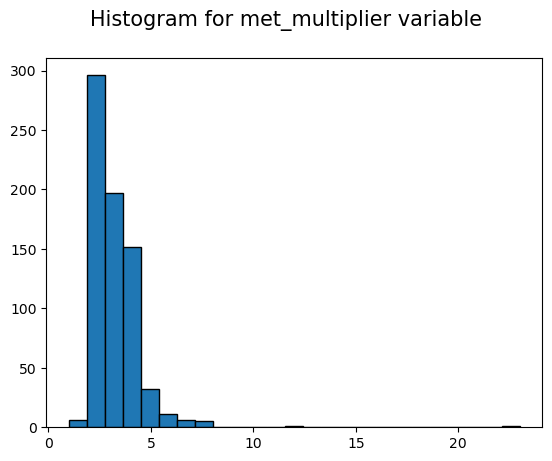

In [33]:
num_t.hist(grid = False, bins = 25, edgecolor='black')
plt.suptitle('Histogram for met_multiplier variable', fontsize = 15)
plt.title('')

Below there is a qqplot of the variable.

Text(0.5, 1.05, 'QQ plot for met_multiplier variable')

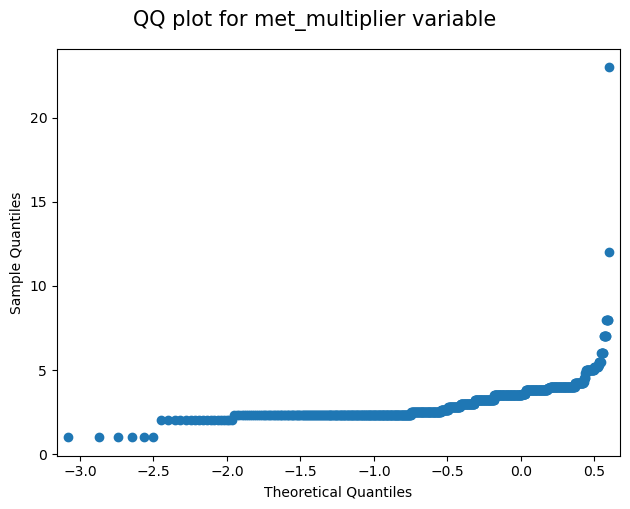

In [34]:
sm.qqplot(num_t['met_multiplier'], line='s')
plt.tight_layout()
plt.suptitle('QQ plot for met_multiplier variable', fontsize = 15, y = 1.05)

In [36]:
normal = pg.normality(num_t, method='shapiro').round(3)
normal

,W,pval,normal
met_multiplier,0.66,0.00,False


From the histogram, qqplot and Shapiro-Wilk test it is seen, that there is no normal distribution in this variable. Another confirmation of non-normality of this data is that kurtosis is over 76 and skewness is almost 6 (for normal distribution kurtosis $= 3$ and skewness $= 0$).

### Data distribution evaluation

In this section, data distribution will be checked (or the closest one). The criterion of determination for best fit is RSS (residual sum of squares). The RSS describes the deviation predicted from actual empirical values of data. For this operation, NULL values have to be deleted.

The best fitting distribution is *nakagami* (RSS = 0.16) and the second closest distribution is *dgamma* (RSS = 0.28), *beta* (RSS = 0.28), *Pearson* (RSS = 0.28) and *erlang* (RSS = 0.28). Below there are values of the RSS and plot of $5$ best fitted distribution.

In [39]:
num_t_null = num_t.dropna()

[distfit] >fit..
[distfit] >transform..
[distfit] >[nakagami] [0.14 sec] [RSS: 0.16195] [loc=2.000 scale=1.899]
[distfit] >[dgamma  ] [0.01 sec] [RSS: 0.276741] [loc=3.087 scale=0.490]
[distfit] >[beta    ] [0.07 sec] [RSS: 0.282509] [loc=0.749 scale=2369999.562]
[distfit] >[pearson3] [0.03 sec] [RSS: 0.283852] [loc=3.227 scale=1.058]
[distfit] >[erlang  ] [0.04 sec] [RSS: 0.283856] [loc=0.728 scale=0.448]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot summary..


(<Figure size 900x400 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: nakagami'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

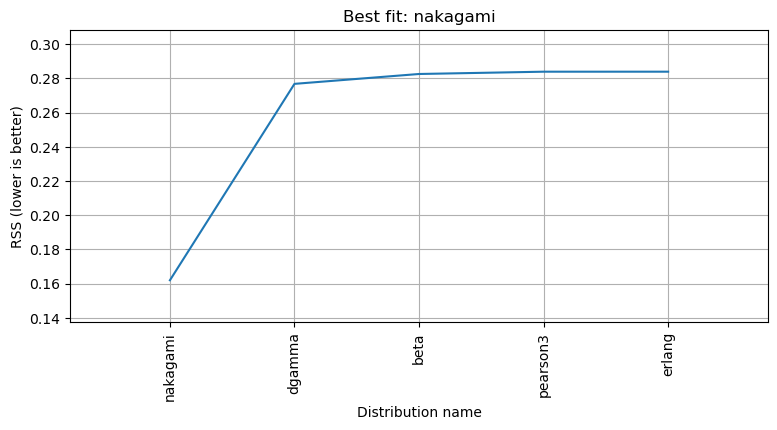

In [43]:
met_m = num_t_null['met_multiplier'].values
dist = distfit(distr=['nakagami', 'dgamma', 'beta', 'pearson3', 'erlang'])
dist.fit_transform(met_m)
#dist.summary # there can be also dist.plot() and it gives the plot of distribution 
dist.plot_summary(figsize = (9,4))

But RSS value for *nakagami* distribution shows that it is still not fitted the best way possible.

### Outliers detection

This section will be done later, when the outlier definition will be given.

## Categorical data

### Frequency tables

In [44]:
def my_freq_table(data, var, sort = True, cumul_percent = False):
    myFreqTable = data[var].value_counts()
    myFreqTable = pd.DataFrame({var: myFreqTable.keys(), 'Frequency': myFreqTable.values})
    myFreqTable = myFreqTable.astype({'Frequency': 'int32'})
    
    if sort == True:
        myFreqTable = myFreqTable.sort_values(by=[var])
        myFreqTable = myFreqTable.reset_index(drop=True)
    
    myFreqTable['Percent'] = myFreqTable['Frequency']/myFreqTable['Frequency'].sum()*100
    
    sum_row1 = myFreqTable['Frequency'].sum()
    sum_row2 = myFreqTable['Percent'].sum()
    sum_row2 = sum_row2.round(2).astype('str') + '%'
    
    myFreqTable['Percent'] = myFreqTable['Percent'].round(2).astype('str') + '%'
    
    if cumul_percent == True:
        myFreqTable['Cumulative Percent'] = myFreqTable['Frequency'].cumsum() / myFreqTable['Frequency'].sum() * 100
        myFreqTable['Cumulative Percent'] = myFreqTable['Cumulative Percent'].round(2).astype('str') + '%'
        sum_row_c = '-'
    
    '''
    if valid_percent == True:
    
        myMissingCategory = [np.NaN]

        myFreqTable2 = myFreqTable
        isNonmisAr = np.array([])

        for i in data[var]:
            isNotMissing=1
            for j in myMissingCategory:
                if i==j:
                    isNotMissing=0
            isNonmisAr = np.append(isNonmisAr, [isNotMissing])
        
        validSum = sum(myFreqTable2['Frequency']*isNonmisAr)
        validPerc = myFreqTable2['Frequency']/validSum*isNonmisAr*100
        
        for i in range(len(validPerc)):
            if isNonmisAr[i]==0:
                validPerc[i]=np.nan
        
        myFreqTable2['Valid Percent'] = validPerc
        
        if cumul_percent == True:
            myFreqTable2['Cumulative Valid Percent'] = myFreqTable2['Valid Percent'].cumsum()
            
            sum_c_2 = '-'
            
            myFreqTable2['Cumulative Valid Percent'] = myFreqTable2['Cumulative Valid Percent'].round(2).astype('str') + '%'
        
        sum_valid_percent = myFreqTable2['Valid Percent'].sum()
        
        myFreqTable2['Valid Percent'] = myFreqTable2['Valid Percent'].round(2).astype('str') + '%'
        
        sum_valid_percent = sum_valid_percent.round(2).astype('str') + '%'
        
        #myFreqTable2 = myFreqTable2.set_index(var)
        
        # return(myFreqTable2)
    
       
    if (valid_percent == True) and (cumul_percent == True):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c, 
                    'Valid Percent': sum_valid_percent,
                    'Cumulative Valid Percent': sum_c_2}
        
    elif (valid_percent == False) and (cumul_percent == True):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c}
        
    elif (valid_percent == True) and (cumul_percent == False):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2,
                    'Valid Percent': sum_valid_percent}
            
    else: new_rows = {'Frequency': sum_row1, 'Percent': sum_row2}
    
    if valid_percent == True:
        myFreqTable = myFreqTable2
    '''
    
    if cumul_percent == True:
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c}
    else: new_rows = {'Frequency': sum_row1, 'Percent': sum_row2}
    
    myFreqTable = myFreqTable.append(new_rows, ignore_index=True)
    cats = data[var].cat.add_categories(['Total'])
    myFreqTable.set_index(cats.cat.categories, inplace = True)
    
    cols = myFreqTable.columns
    
    for col in cols:
        if col == var:
            myFreqTable = myFreqTable.drop(var, axis = 1)
    #myFreqTable.rename(index = {'NaN': 'Total'}, inplace = True)
    
    return(myFreqTable)
    

In [46]:
cat_table = exercises2.loc[:, ['name_en','met_multiplier_category']]

name_en = my_freq_table(cat_table, var = 'name_en', cumul_percent = True)
met_multiplier_category = my_freq_table(cat_table, var = 'met_multiplier_category', cumul_percent = True)

met_multiplier_category

,Frequency,Percent,Cumulative Percent
light,331,46.82%,46.82%
moderate,363,51.34%,98.16%
vigorous,13,1.84%,100.0%
Total,707,100.0%,-


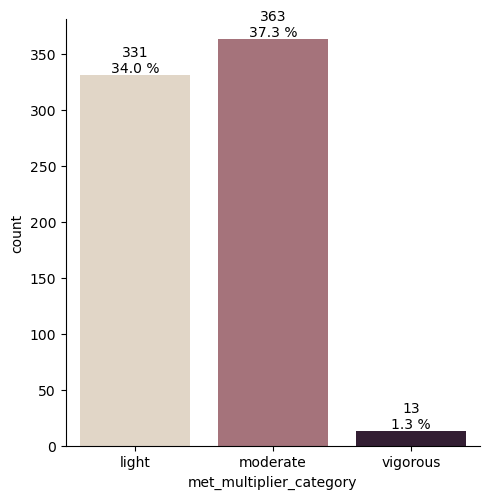

In [57]:
total = len(cat_table)
g = sns.catplot(data=cat_table, x='met_multiplier_category', kind="count", palette="ch:.25")
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{v.get_height()}\n{v.get_height()/total * 100.0:.1f} %' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

Most of the exercises have *met_multiplier_category* as *moderate* - $363$ exercises ($51\%$), then *light* category - $331$ exercises ($47\%$) and only $13$ ($2\%$) exercises have *vigorous* category. 

When it comes to names category, it can be seen that a lot of exercises names are duplicated. Most frequently duplicated was *Superman* (5 times). Below there is a frequency table and barplot with top 20 frequency of duplicated exercise names.

In [48]:
name_en.sort_values('Frequency', ascending=False)

,Frequency,Percent,Cumulative Percent
Total,852,100.0%,-
Superman,5,0.59%,85.33%
Jumping jacks,4,0.47%,41.55%
Plank balance,3,0.35%,59.98%
Plank spider,3,0.35%,61.5%
...,...,...,...
High squat,1,0.12%,36.38%
Hindu knee push-up,1,0.12%,36.5%
Animal Walk,1,0.12%,3.29%
Hip boxing,1,0.12%,36.85%


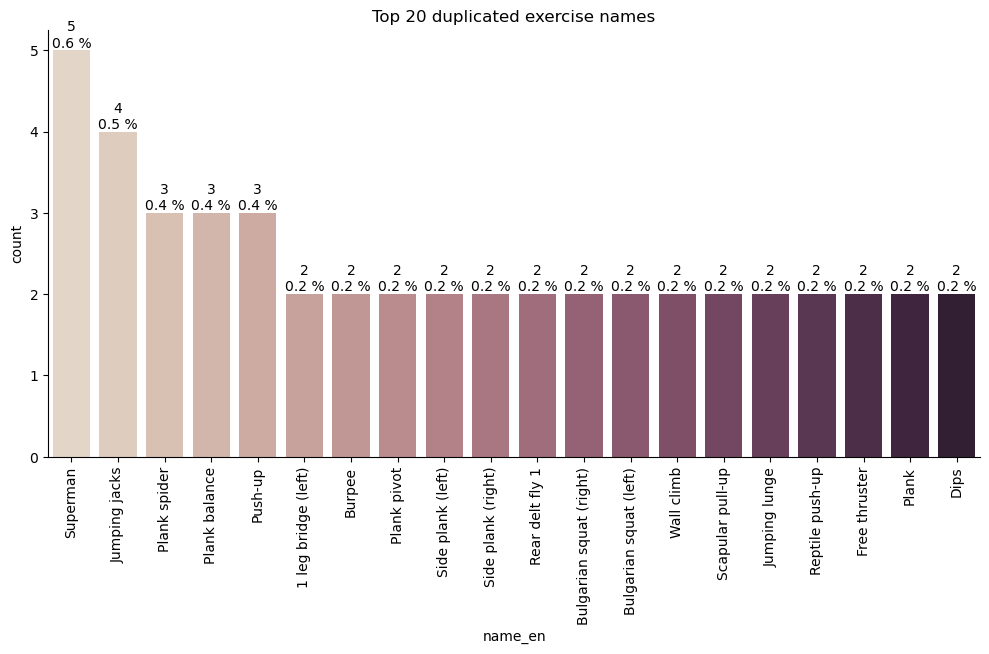

In [56]:
total = cat_table['name_en'].count()
g = sns.catplot(data=cat_table, x='name_en', kind="count", palette="ch:.20",
                order=cat_table.name_en.value_counts().iloc[:20].index, 
                height=5, aspect=2).set(title = 'Top 20 duplicated exercise names')

g.set_xticklabels(rotation = 90)

ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{v.get_height()}\n{v.get_height()/total * 100.0:.1f} %' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')